In [ ]:
def tail(filename, n=10):
    with open(filename, 'r') as file:
        lines = file.readlines()

    last_lines = lines[-n:]
    return "".join(last_lines)


if __name__ == "__main__":
    file_name = input("Ingrese el nombre del archivo: ")
    try:
        result = tail(file_name)
        print(result)
    except FileNotFoundError:
        print("Error: El archivo no existe.")
    except Exception as e:
        print("Error desconocido:", str(e))
        

In [ ]:
def cesar_cipher(text, shift):
    alphabet = "abcdefghijklmnñopqrstuvwxyz"
    VDX = "áéíóú"
    WDX = "aeiou"

    def shift_char(c, shift):
        if c.lower() in alphabet:
            is_upper = c.isupper()
            C_L = c.lower()
            if C_L in VDX:
                C_L = WDX[VDX.index(C_L)]
            S_I = (alphabet.index(C_L) + shift) % len(alphabet)
            S_C = alphabet[S_I]
            return S_C.upper() if is_upper else S_C
        return c

    return "".join(shift_char(c, shift) for c in text)


if __name__ == "__main__":
    n_cifr = int(input("Ingrese el número de espacios para cifrar: "))
    try:
        with open("Escritorio/texto.dat", "r", encoding="utf-8") as file:
            text = file.read()
            CT = cesar_cipher(text, n_cifr)

        with open("Escritorio/texto_cifrado.dat", "w", encoding="utf-8") as file:
            file.write(CT)

        print("Cifrado exitoso. El mensaje cifrado ha sido guardado en 'texto_cifrado.dat'")
    except FileNotFoundError:
        print("Error: No se encontró el archivo 'texto.dat'.")
    except Exception as e:
        print("Error desconocido:", str(e))


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
source_id =[]
l = []
b = []
parallax = []
g_mean_mag = []
e_g_mean_mag= []
rp_mean_mag = []
e_rp_mean_mag=[]
radial_velocity = []
radial_velocity_error = []

gaia_estrellas_100pc = open("Escritorio/Gaia_estrellas_100pc.dat","r")
gaia_estrellas_100pc.readline()
for lin in gaia_estrellas_100pc:
    source_id.append(float(lin.split()[1]))
    l.append(float(lin.split()[1]))
    b.append(float(lin.split()[2]))
    parallax.append(float(lin.split()[3]))
    g_mean_mag.append(float(lin.split()[4]))
    e_g_mean_mag.append(float(lin.split()[5]))
    rp_mean_mag.append(float(lin.split()[6]))
    e_rp_mean_mag.append(float(lin.split()[7]))
    radial_velocity.append(float(lin.split()[8]))
    radial_velocity_error.append(float(lin.split()[9]))
gaia_estrellas_100pc.close()

source_id= np.array(source_id)
l = np.array(l)
b = np.array(b)
parallax = np.array(parallax)
g_mean_mag=np.array(g_mean_mag)
e_g_mean_mag = np.array(e_g_mean_mag)
rp_mean_mag = np.array(rp_mean_mag)
e_rp_mean_mag = np.array(e_rp_mean_mag)
radial_velocity=np.array(radial_velocity)
radial_velocity_error=np.array(radial_velocity)

l1 = [-val for val in l]

In [ ]:
fig=plt.figure(1,figsize=(15,7))
fig.subplots_adjust(left=0.14,bottom=0.13,\
                    right=0.95,top=0.97,hspace=0.24,wspace=.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("Longitud Galactica(Grados)", fontsize=20)
ax1.set_ylabel("Latitud Galactica(Grados)", fontsize=20)
ax1.set_title("Densidad de estrellas en coordenadas galacticas", fontsize=20)
linea1=plt.axvline(-10,-80,80,ls="--",c="white")
linea=plt.axvline(10,-80,80,ls="--",c="white")

cc= ax1.hist2d(l1, b, bins=(170,180), cmap="gist_earth",cmin=1,norm=mpl.colors.LogNorm())
cc= ax1.hist2d(l,b,bins=(170,180), cmap="gist_earth",cmin=1,norm=mpl.colors.LogNorm())
cc= plt.colorbar(cc[3])
cc.set_label("Log10(N)", fontsize=20)
ax1.set_xlim(-180,180)
ax1.set_ylim(-90,90)

plt.show()

In [ ]:
fig =plt.figure(1, figsize=(15,7))
ax1= fig.add_subplot(111)
ax1.set_xlabel("Longitud Galactica", fontsize= 20)
ax1.set_ylabel("Lattitud Galactica", fontsize= 20)
ax1.set_xlim(0,180)
ax1.set_ylim(80,80)
cc= ax1.scatter(b,l,marker=("."), edgecolor = "none", s=10, c=g_mean_mag, cmap= "gist_earth")


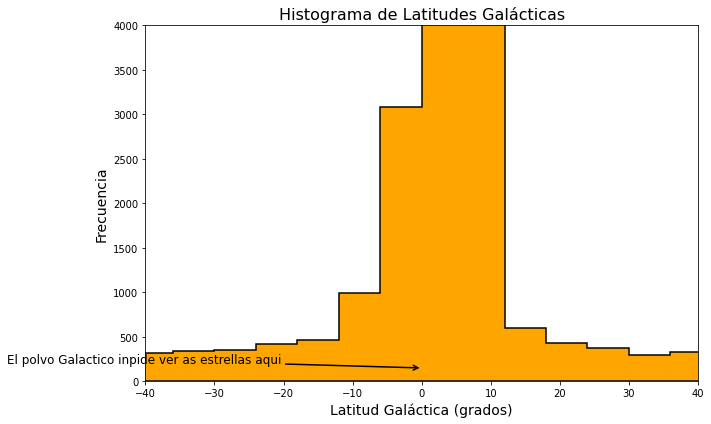

In [11]:
mask = (l >= -10) & (l <= 10)
latitudes_galacticas = b[mask]

plt.figure(figsize=(10, 6))
plt.hist(latitudes_galacticas, bins=30, range=(-90, 90), color='orange', linewidth=1.5, histtype='stepfilled'\
         ,edgecolor='black')

plt.title('Histograma de Latitudes Galácticas', fontsize=16)
plt.xlabel('Latitud Galáctica (grados)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

plt.xlim(-40, 40)
plt.ylim(0,4000)

plt.annotate('El polvo Galactico inpide ver as estrellas aqui', xy=(0, 150), xytext=(-60, 200), fontsize=12,
             arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

plt.tight_layout()
plt.show()
